In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
injected_found = pd.read_csv("../psrc_lists/injectedi_2_10_psrcs__2aspcmsubqm2_fitel_0f09-to-35f5Hz_qc_0p6rr_M_PdoCals_dt20_snr_iter1_5.0sigma.csv")
injected_found2 = pd.read_csv("../psrc_lists/injectedi_2_10_psrcs__2aspcmsubqm2_fitel_0f09-to-35f5Hz_qc_0p6rr_M_PdoCals_dt20_snr_iter1_3.0sigma.csv")
injected = pd.read_csv("../psrc_lists/fake_pnt_amplitudes.txt",names=["Cluster","amp(jy)","X_loc(pixels)","y_loc(pixels)"],header=None,delimiter=r"\s+")
real = pd.read_csv("../psrc_lists/uncleaned_psrcs_sigma__2aspcmsubqm2_fitel_0f09-to-35f5Hz_qc_0p6rr_M_PdoCals_dt20_snr_iter1_4.0sigma.csv")
real = real.loc[(real["theta_1"]==2.0)&(real["theta_2"]==6.0)]

In [70]:
final = pd.read_csv("../psrc_lists/final_cat_snr_5_3arcmin_snr_7.csv")

In [138]:
len(injected_found)

295

In [139]:
len(injected)

351

In [63]:
injected_found.loc[injected_found["cluster"]=="ACT-CLJ0200.3+0019"]

,cluster,x,y,sigma_dog,theta_1,theta_2,ra_deg,dec_deg,dist_center_radians,amp_fit,...,sigma,int_flux_Jy,amp_snr,x_snr,y_snr,sigma_snr,snr,masked,noise_ps,hits_ps
0,ACT-CLJ0200.3+0019,168.0,169.0,3.2,2.0,6.0,30.087342,0.327579,0.000089,0.013327,...,3.0,0.013926,66.873112,168.462331,168.721360,0.362385,49.248188,0.0,0.000122,3812276.75
1,ACT-CLJ0200.3+0019,181.0,179.0,3.2,2.0,6.0,30.080120,0.333135,0.000247,0.001313,...,3.0,0.001372,11.883610,179.930340,178.754975,-0.391572,7.799314,0.0,0.000125,3742779.50


In [64]:
real.loc[real["cluster"]=="ACT-CLJ0200.3+0019"]

,cluster,x,y,sigma_dog,theta_1,theta_2,ra_deg,dec_deg,dist_center_radians,amp_fit,...,Unnamed: 0,Source,rms_map,rms_snr,avg_snr,ntail,amp_fit_snr,mean_fit_snr,std_fit_snr,red_type
2,ACT-CLJ0200.3+0019,258.0,170.0,3.20,2.0,6.0,30.037093,0.328150,0.000934,0.002436,...,0,ACT-CLJ0200.3+0019,0.000134,1.0082,0.114192,0.0,3219.083286,-0.004205,1.043256,20.0
3,ACT-CLJ0200.3+0019,223.0,124.0,5.12,2.0,6.0,30.056538,0.302595,0.000697,0.000659,...,0,ACT-CLJ0200.3+0019,0.000134,1.0082,0.114192,0.0,3219.083286,-0.004205,1.043256,20.0
4,ACT-CLJ0200.3+0019,118.0,262.0,5.12,2.0,6.0,30.114872,0.379261,0.001059,-0.000640,...,0,ACT-CLJ0200.3+0019,0.000134,1.0082,0.114192,0.0,3219.083286,-0.004205,1.043256,20.0


In [76]:
m = injected_found.merge(real,how="left",left_on=["cluster","x","y"],right_on=["cluster","x","y"],indicator=True)

In [86]:
m = m.loc[m["_merge"]=="left_only"]

In [129]:
bright_injected = injected.loc[injected["amp(jy)"]>0.005]

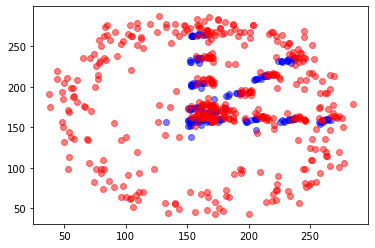

In [136]:
#plt.scatter(final["x"],final["y"],c="g")

#plt.scatter(injected["X_loc(pixels)"],injected["y_loc(pixels)"],c="b",alpha=0.5)
plt.scatter(bright_injected["X_loc(pixels)"],bright_injected["y_loc(pixels)"],c="b",alpha=0.5)
plt.scatter(m["x"],m["y"],c="r",alpha=0.5)
#plt.scatter(real["x"],real["y"],c="g")
#plt.xlim(140,324)
#plt.ylim(140,324)

In [98]:
injected["y"] = 324-injected["X_loc(pixels)"]
injected["x"] = 324-injected["y_loc(pixels)"]

In [117]:
injected["amp(jy)"]

0      0.030
1      0.007
2      0.003
3      0.001
4      0.030
       ...  
346    0.003
347    0.001
348    0.030
349    0.007
350    0.003
Name: amp(jy), Length: 351, dtype: float64

In [124]:
injected_found["sigma"]

0      3.0
1      3.0
2      3.0
3      3.0
4      3.0
      ... 
468    3.0
469    3.0
470    3.0
471    3.0
472    3.0
Name: sigma, Length: 473, dtype: float64

In [121]:
real["sigma_dog"]

2       3.20
3       5.12
4       5.12
29      5.12
30      5.12
        ... 
5174    5.12
5175    5.12
5176    3.20
5177    5.12
5178    5.12
Name: sigma_dog, Length: 467, dtype: float64

(array([  2.,  13., 261., 118.,   7.,  42.,  28.,   0.,   0.,   2.]),
 array([-0.01794886, -0.01046464, -0.00298041,  0.00450381,  0.01198803,
         0.01947226,  0.02695648,  0.0344407 ,  0.04192493,  0.04940915,
         0.05689338]),
 <BarContainer object of 10 artists>)

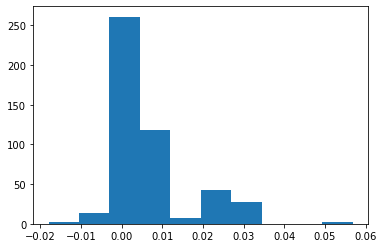

In [50]:
plt.hist(injected_found["int_flux_Jy"])